# Word2Vec Intro
Understand how word2vec algorithm works

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/elephantscale/cool-demos/blob/main/nlp/word2vec-1-intro.ipynb)

### Runtime
15 mins


references
- https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

## Overview

Checkout [projector.tensorflow.org](https://projector.tensorflow.org/)  for online demo!

## Step 1 - Data

In [1]:
## Here we are skipping stop words like : is, are
sentences = [
        'dog  cat  domestic animals'.split(),   # 'dog and cat are domestic animals'
        'dog  cat  pets'.split(),   # dog and cat are pets
        'dog  cat  enemies'.split(),  # dog and cat are enemies
        'sushi fish'.split(),  # sushi has fish
        'sushi  rice'.split()  # sushi has rice
]

## Step 2 - Train a Word2Vec model

In [2]:
%%time
from gensim.models import Word2Vec

# train
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)

Word2Vec(vocab=9, size=100, alpha=0.025)
CPU times: user 669 ms, sys: 689 ms, total: 1.36 s
Wall time: 364 ms


In [3]:
# summarize vocabulary
model.wv.vocab

{'dog': <gensim.models.keyedvectors.Vocab at 0x7f3db02272b0>,
 'cat': <gensim.models.keyedvectors.Vocab at 0x7f3db0227550>,
 'domestic': <gensim.models.keyedvectors.Vocab at 0x7f3db0227588>,
 'animals': <gensim.models.keyedvectors.Vocab at 0x7f3db02275c0>,
 'pets': <gensim.models.keyedvectors.Vocab at 0x7f3d92cb9cc0>,
 'enemies': <gensim.models.keyedvectors.Vocab at 0x7f3d92cb9cf8>,
 'sushi': <gensim.models.keyedvectors.Vocab at 0x7f3d92aed2b0>,
 'fish': <gensim.models.keyedvectors.Vocab at 0x7f3d92a1bc88>,
 'rice': <gensim.models.keyedvectors.Vocab at 0x7f3d929e72b0>}

In [4]:
## access vector for one word
print(model.wv['dog'])

[-4.8351591e-03  3.4744530e-03 -1.4519688e-03 -3.2536306e-03
 -3.7812891e-03 -2.9908826e-03  2.8983282e-03 -8.0656190e-04
  2.8796170e-03 -1.7652292e-03 -2.5155430e-03  3.0750860e-03
  1.1371209e-03  1.3201663e-03 -3.0576226e-03  2.0660197e-03
  1.2492742e-03  1.4134261e-03 -1.8425760e-04  2.0438877e-03
 -1.9448301e-03  8.3302111e-05 -1.5790496e-03  3.8306194e-03
 -4.4419779e-03 -2.3121426e-03 -1.6115182e-03 -3.7887241e-03
  6.5071322e-04 -1.0384436e-03 -3.8295430e-03  2.4209949e-03
 -4.8135202e-03  2.4192906e-03  3.5803777e-03  5.2367459e-04
  1.4203154e-03  2.8078414e-03 -3.0081666e-03 -1.7360783e-03
  3.8228966e-03 -1.0841951e-03 -1.4380576e-03  5.7306909e-04
 -2.7666714e-03  3.8534575e-04 -6.5972086e-04  1.3162927e-03
  1.5718110e-03 -1.4500398e-03 -1.1755885e-03 -1.1756103e-03
  3.1252897e-03 -3.7989309e-03  3.7095458e-03 -2.6361065e-03
 -2.1640293e-03  3.0332084e-03 -5.8502116e-04  2.4220461e-03
 -4.8750886e-03 -2.4334404e-03 -8.3359348e-04 -4.2625610e-03
 -3.9423630e-03 -1.51917

## Step 3 - Plot the model
Here we are reducing the model from 100 dimensions to just 2, so we can plot.  
We are using PCA algorithm to reduce the dimensions.

Does this plot makes sense? :-)  
We don't have much data !

/home/ubuntu/apps/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


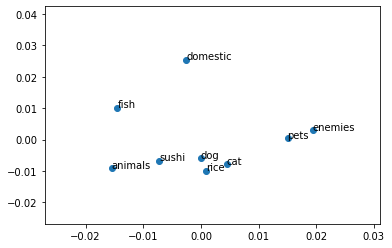

In [5]:
%matplotlib inline
from matplotlib import pyplot
from gensim.models import Word2Vec
from sklearn.decomposition import PCA


# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Step 4 - Find Similarities

In [6]:
model.wv.most_similar('cat')
## does the result make sense? :-) 

[('pets', -0.0101076140999794),
 ('enemies', -0.03429441899061203),
 ('rice', -0.037227384746074677),
 ('sushi', -0.04112032800912857),
 ('domestic', -0.07325896620750427),
 ('animals', -0.07641163468360901),
 ('dog', -0.08209918439388275),
 ('fish', -0.11530392616987228)]

In [7]:
model.wv.most_similar('rice')

[('dog', 0.19546133279800415),
 ('enemies', 0.05798426270484924),
 ('domestic', 0.05686376616358757),
 ('animals', 0.010168250650167465),
 ('sushi', -0.009622186422348022),
 ('cat', -0.03722739592194557),
 ('fish', -0.07810284197330475),
 ('pets', -0.09488852322101593)]

## Step 5 - More 'complicated' Queries
Here we can ask more complex queries.  
The results are fun

In [21]:
 model.wv.most_similar(positive=['rice', 'sushi'])

[('dog', 0.1380930095911026),
 ('domestic', 0.011850079521536827),
 ('fish', -0.019081924110651016),
 ('enemies', -0.021102789789438248),
 ('animals', -0.03029714897274971),
 ('cat', -0.055668674409389496),
 ('pets', -0.10723534226417542)]

In [22]:
 model.wv.most_similar(positive=['cat', 'dog'], negative=['fish'], topn=1)

[('enemies', 0.16210830211639404)]

## Step 6 - Save the model

In [8]:
# save
model.save('my_model.bin')
print ("saved")

saved


In [9]:
## load the saved model
new_model = Word2Vec.load('my_model.bin')
print(new_model)

Word2Vec(vocab=9, size=100, alpha=0.025)


In [10]:
new_model.wv.vocab

{'dog': <gensim.models.keyedvectors.Vocab at 0x7f3d889304e0>,
 'cat': <gensim.models.keyedvectors.Vocab at 0x7f3d889307f0>,
 'domestic': <gensim.models.keyedvectors.Vocab at 0x7f3d889301d0>,
 'animals': <gensim.models.keyedvectors.Vocab at 0x7f3d88930a90>,
 'pets': <gensim.models.keyedvectors.Vocab at 0x7f3d88930be0>,
 'enemies': <gensim.models.keyedvectors.Vocab at 0x7f3d88930eb8>,
 'sushi': <gensim.models.keyedvectors.Vocab at 0x7f3d88930e10>,
 'fish': <gensim.models.keyedvectors.Vocab at 0x7f3d88930a20>,
 'rice': <gensim.models.keyedvectors.Vocab at 0x7f3d88930e48>}

In [19]:
## query the new model
new_model.wv.most_similar('fish')

[('domestic', 0.2768159508705139),
 ('dog', 0.12614695727825165),
 ('animals', 0.11893367767333984),
 ('sushi', 0.05124707147479057),
 ('pets', -0.047772884368896484),
 ('rice', -0.07810284197330475),
 ('cat', -0.11530394107103348),
 ('enemies', -0.15925821661949158)]

## Step 7 - Experiment
In Step-1, come up with some text data so our model is 'smarter'!  
Share your results with the class.